In [1]:
import pandas as pd
import numpy as np

In [18]:
path='https://raw.githubusercontent.com/pranavkotak8/Datasets/master/ecoli.csv'
df1=pd.read_csv(path)

In [19]:
df1

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [20]:
# Finding the Missing Values
df1.isna().sum()/len(df1)

mcg      0.0
gvh      0.0
lip      0.0
chg      0.0
aac      0.0
alm1     0.0
alm2     0.0
class    0.0
dtype: float64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     327 non-null    float64
 1   gvh     327 non-null    float64
 2   lip     327 non-null    float64
 3   chg     327 non-null    float64
 4   aac     327 non-null    float64
 5   alm1    327 non-null    float64
 6   alm2    327 non-null    float64
 7   class   327 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 20.6 KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


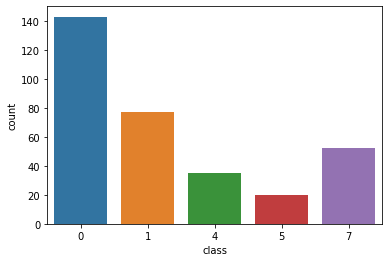

In [22]:
# Lets check out the Target Column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df1['class'])
plt.show()

In [23]:
target=df1['class']

In [24]:
df1.drop(columns={'class'},inplace=True)

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [26]:
# Balancing the target column

Class=0, n=143 (20.000%)
Class=1, n=143 (20.000%)
Class=4, n=143 (20.000%)
Class=5, n=143 (20.000%)
Class=7, n=143 (20.000%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

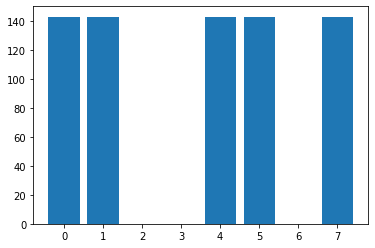

In [28]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(df1, target)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


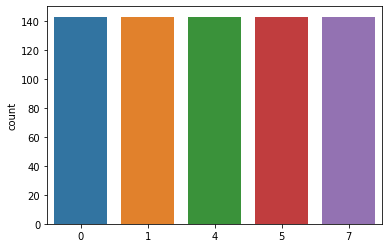

In [29]:
# New Balanced Target Feature Column
import seaborn as sns
sns.countplot(y)

In [30]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [31]:
y=pd.DataFrame(y)
y.replace(1,0,inplace=True)
y.replace(2,1,inplace=True)
y.replace(3,2,inplace=True)
y.replace(4,3,inplace=True)
y.replace(5,4,inplace=True)
y.replace(6,5,inplace=True)
y.replace(7,6,inplace=True)


In [32]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)

In [33]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [34]:
np.mean(scores)

0.8828680396643783

In [35]:
scores_sgd=cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [36]:
np.mean(scores_sgd)

0.8582761250953469

In [40]:
#Logistic Regression
from sklearn.metrics import accuracy_score
logistic.fit(X_train,y_train)
y_test_pred_lr = logistic.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.8951048951048951


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# SGD Classifier
sgd.fit(X_train,y_train)
y_test_pred_sgd = sgd.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_sgd)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.8601398601398601


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.965034965034965


In [44]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [45]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [46]:
X_train.shape

(572, 7)

In [47]:
# Performing Neural Network on X_train and Y_train
model=Sequential()
model.add(Dense(units=50, activation='relu', input_dim=7))
model.add(Dense(units=205, activation='relu'))
model.add(Dense(units=1041, activation='relu'))
model.add(Dense(units=201))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(units=7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
4/4 [==============================] - 0s 51ms/step - loss: 1.8511 - accuracy: 0.2910 - val_loss: 1.6029 - val_accuracy: 0.4522
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.5216 - accuracy: 0.3851 - val_loss: 1.2748 - val_accuracy: 0.4522
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.2453 - accuracy: 0.4311 - val_loss: 1.0787 - val_accuracy: 0.7913
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0389 - accuracy: 0.7943 - val_loss: 0.8983 - val_accuracy: 0.6087
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8829 - accuracy: 0.6214 - val_loss: 0.8059 - val_accuracy: 0.7130
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7532 - accuracy: 0.7615 - val_loss: 0.6752 - val_accuracy: 0.7739
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6235 - accuracy: 0.7943 - val_loss: 0.5565 - val_accuracy: 0.8087
Epoch 8/100
4/4 [===

In [48]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9301


[0.24461206793785095, 0.9300699234008789]

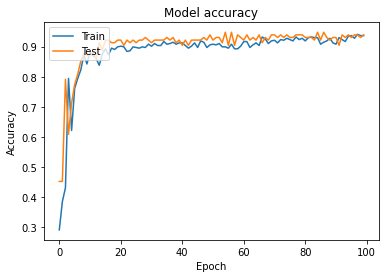

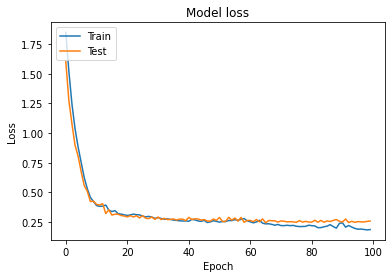

In [49]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()